In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import and read file
df = pd.read_excel(r'sample-data.xlsx')
df.head() # it returns the first five rows of the dataset

Sales Person    Country              Product       Date  Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04    5320   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01    7896   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07    4501   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27   12726   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24   13685   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184

In [3]:
# it returns the last five rows of the dataset
df.tail()

Sales Person    Country              Product       Date  Amount  \
1089  Karlen McCaffrey  Australia  Spicy Special Slims 2022-05-17    4410   
1090    Jehu Rudeforth        USA           White Choc 2022-06-07    6559   
1091      Ches Bonnell     Canada  Organic Choco Syrup 2022-07-26     574   
1092    Dotty Strutley      India              Eclairs 2022-07-28    2086   
1093  Karlen McCaffrey      India       70% Dark Bites 2022-05-23    5075   

      Boxes Shipped  
1089            323  
1090            119  
1091            217  
1092            384  
1093            344

In [4]:
# shape of dataframe
df.shape

(1094, 6)

In [5]:
# info of data
df.info() # it returns the metadata info of your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int64         
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 51.4+ KB


In [6]:
# check for missing values
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [7]:
# summary statistical analysis
df.describe()

Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145

The data covers shipping trends for a growing business over an 8-month period from January to August 2022. Key points:

The business shipped an average of 162 boxes per day, with a median of 135 boxes.
Shipping volume ranged from a minimum of 1 box to a maximum of 709 boxes in a single day, indicating high variability.
The average daily shipping value was `$5,652`, with a median of `$4`,869, again showing a wide range from a minimum of $7 to a maximum of `$22,050`.
25% of shipments occurred before March 2nd, while 75% were completed by July 4th, suggesting a steady increase in volume over the first half of the year.

# Data Visualization

**- Time Series Analysis:**

In [11]:
# to rename "Amount" to "Sales"
df.rename(columns={'Amount':'Sales'}, inplace=True)
df.head(2)

Sales Person Country          Product       Date  Sales  Boxes Shipped
0  Jehu Rudeforth      UK  Mint Chip Choco 2022-01-04   5320            180
1     Van Tuxwell   India    85% Dark Bars 2022-08-01   7896             94

In [12]:
# Trend of Sales
trend_sales = df.groupby('Date')['Sales'].sum()
trend_sales

Date
2022-01-03    40425
2022-01-04    77175
2022-01-05    29162
2022-01-07     8666
2022-01-10    51471
              ...  
2022-08-24    43400
2022-08-25    40341
2022-08-26    17556
2022-08-30    23072
2022-08-31     5614
Name: Sales, Length: 168, dtype: int64

In [13]:
type(trend_sales)

pandas.core.series.Series

Text(0.5, 0, 'Date')

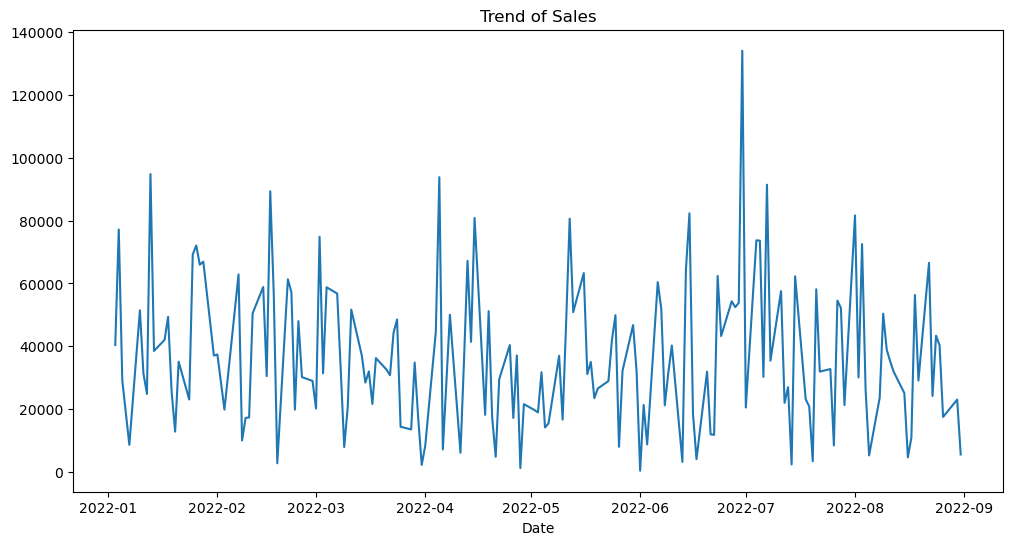

In [14]:
import numpy as np

plt.figure(figsize=(12, 6))
sns.lineplot(x=np.array(trend_sales.index), y=np.array(trend_sales.values))
plt.title('Trend of Sales')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

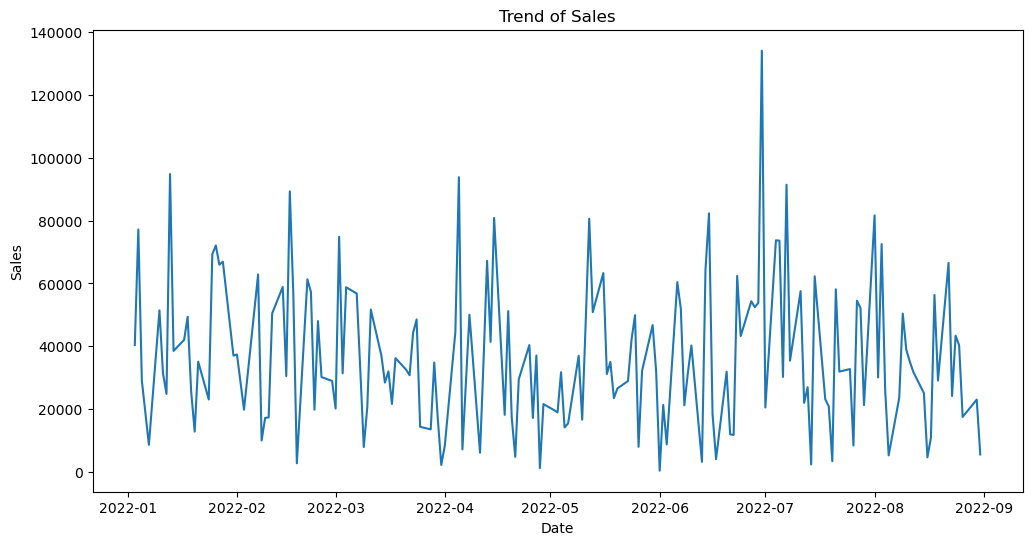

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=trend_sales.index, y=trend_sales)
plt.title('Trend of Sales')
plt.xlabel('Date')


In [16]:
# filter month from date
df['Month'] = df['Date'].dt.month
df.head(2)

Sales Person Country          Product       Date  Sales  Boxes Shipped  \
0  Jehu Rudeforth      UK  Mint Chip Choco 2022-01-04   5320            180   
1     Van Tuxwell   India    85% Dark Bars 2022-08-01   7896             94   

   Month  
0      1  
1      8

In [17]:
# to put the month as month name
df['Month Name'] = df['Date'].dt.strftime('%B')
df.head(2)

Sales Person Country          Product       Date  Sales  Boxes Shipped  \
0  Jehu Rudeforth      UK  Mint Chip Choco 2022-01-04   5320            180   
1     Van Tuxwell   India    85% Dark Bars 2022-08-01   7896             94   

   Month Month Name  
0      1    January  
1      8     August

In [18]:
# Trend of Sales by month
trend_sales_month = df.groupby('Month Name')['Sales'].sum()
trend_sales_month

Month Name
April       674051
August      743148
February    699377
January     896105
July        803425
June        865144
March       749483
May         752892
Name: Sales, dtype: int64

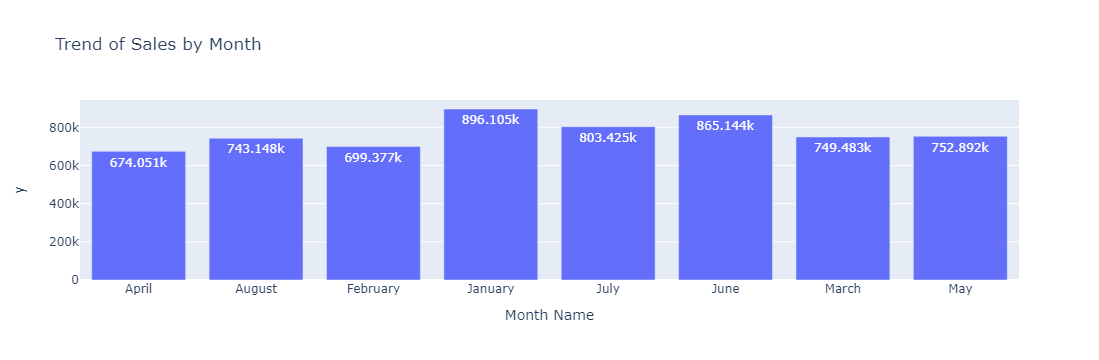

In [19]:
plot_trend_sales_month = px.bar(trend_sales_month, x=trend_sales_month.index, y=trend_sales_month.values, text_auto=True, title='Trend of Sales by Month')
plot_trend_sales_month.show()

In [20]:
import nbformat
print(nbformat.__version__)

5.9.2


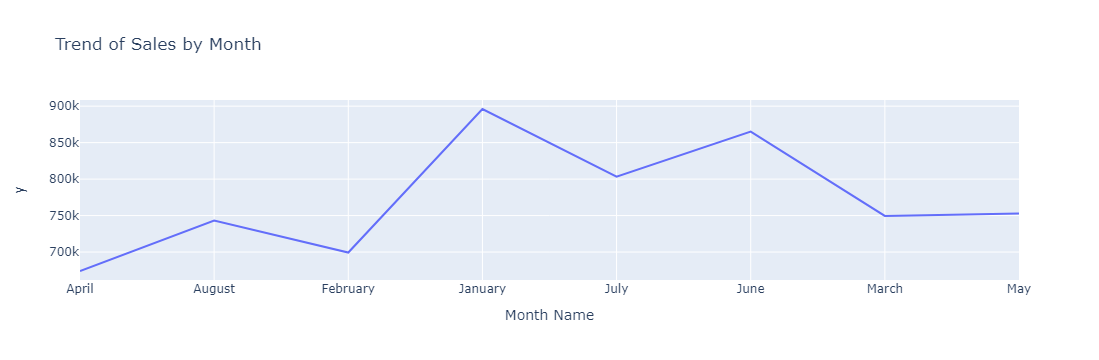

In [21]:
plot_trend_sales_month = px.line(trend_sales_month, x=trend_sales_month.index, y=trend_sales_month.values, title='Trend of Sales by Month')
plot_trend_sales_month.show()

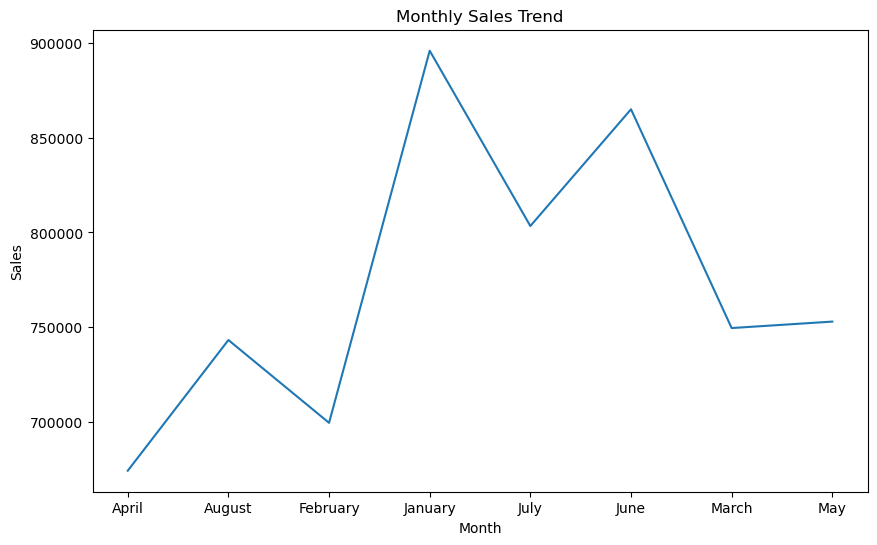

In [22]:
plt.figure(figsize = (10,6))
trend_sales_month.plot()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

## Country Analysis

In [24]:
# country by total revenue
df['Country'].unique().tolist()

['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada']

In [25]:
country_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=True)
country_revenue

Country
New Zealand     950418
Canada          962899
USA            1035349
India          1045800
UK             1051792
Australia      1137367
Name: Sales, dtype: int64

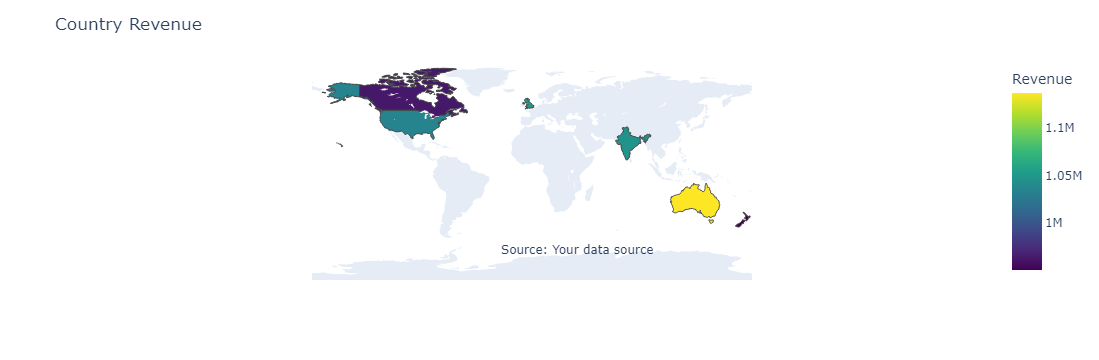

In [26]:
import pandas as pd
import plotly.express as px

# Assuming you have the country revenue data in a DataFrame named 'df'
country_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Create a new DataFrame with the country revenue data
data = pd.DataFrame({
    'Country': country_revenue.index,
    'Revenue': country_revenue.values
})

# Manually map country names to ISO 3-letter codes
country_codes = {
    'Australia': 'AUS',
    'UK': 'GBR',
    'India': 'IND',
    'USA': 'USA',
    'Canada': 'CAN',
    'New Zealand': 'NZL'
}

data['Country_Code'] = data['Country'].map(country_codes)

# Create the map visualization
fig = px.choropleth(data, locations='Country_Code', color='Revenue',
                   hover_name='Country', hover_data=['Revenue'],
                   color_continuous_scale='Viridis')

# Customize the map layout
fig.update_layout(
    title='Country Revenue',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations=[dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: Your data source',
        showarrow=False
    )]
)

# Display the map
fig.show()


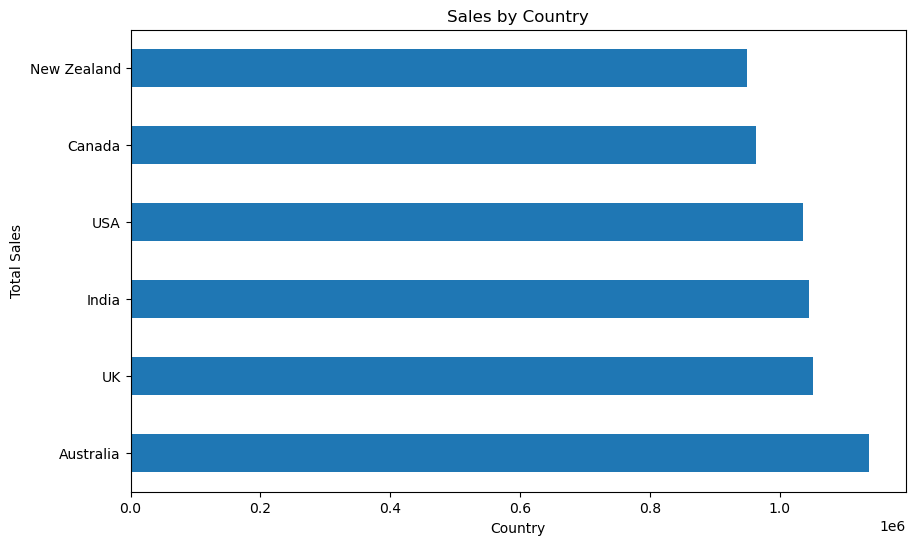

In [175]:
# Country by Sales with matplotlib
plt.figure(figsize=(10,6))
country_revenue.plot(kind = 'barh')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.show()

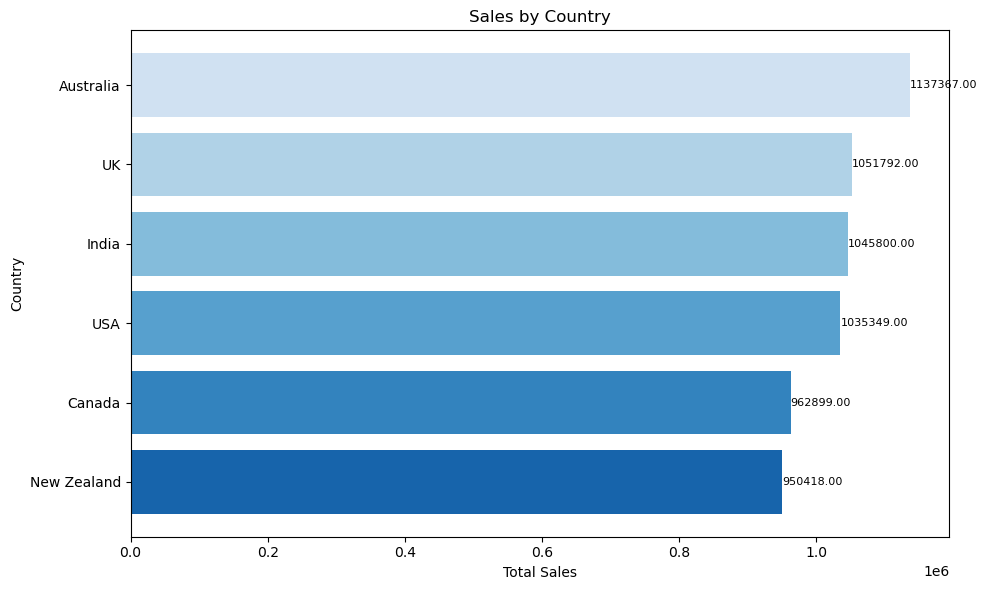

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# Assuming 'country_revenue' is a pandas Series
country_revenue = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.barh(country_revenue.index, country_revenue.values, color=plt.cm.Blues(np.linspace(0.2, 0.8, len(country_revenue))))

# Add data labels
for i, value in enumerate(country_revenue.values):
    ax.text(value, i, f"{value:.2f}", va='center', ha='left', fontsize=8)

# Customize the chart
ax.set_xlabel('Total Sales')
ax.set_ylabel('Country')
ax.set_title('Sales by Country')
ax.invert_yaxis()  # Flip the y-axis to have the countries in descending order
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
# Country by Boxes Shipped
df.columns.to_list()

['Sales Person',
 'Country',
 'Product',
 'Date',
 'Sales',
 'Boxes Shipped',
 'Month',
 'Month Name']

In [30]:
country_boxes = df.groupby('Country')['Boxes Shipped'].mean().astype('int')
country_boxes 

Country
Australia      159
Canada         178
India          160
New Zealand    153
UK             170
USA            149
Name: Boxes Shipped, dtype: int32

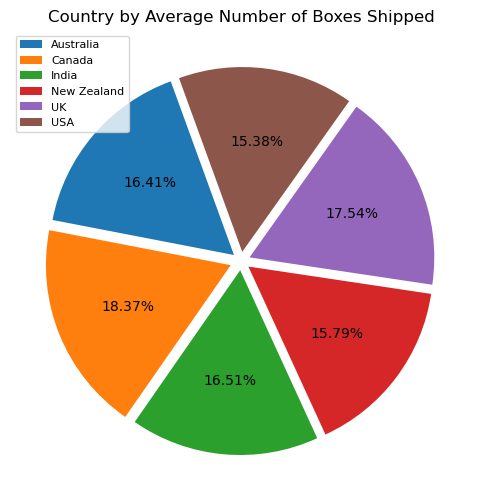

In [31]:
# Set the colors for each slice of the pie chart
colors = ['#FF0000', '#800000', '#FFC0CB']

# Set the explode parameter to highlight certain slices
explode = (0.05, 0.06, 0.05, 0.05, 0.05, 0.05)

# Create a figure and axis object with the figsize parameter
fig, ax = plt.subplots(figsize=(10, 6))

# Create a pie chart for the top 3 products purchased by customers
ax.pie(country_boxes, autopct='%1.2f%%', startangle=110, explode=explode)

# add legends
plt.legend(country_boxes.index, loc='upper left', fontsize=8)

# Set the title of the pie chart
plt.title('Country by Average Number of Boxes Shipped', fontsize=12)

# Show the plot
plt.show()



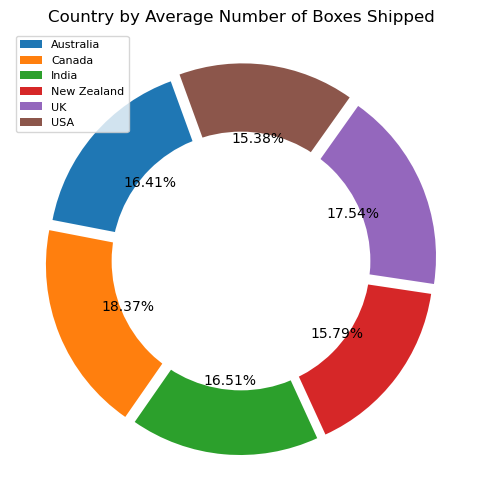

In [83]:
# Set the explode parameter to highlight certain slices
explode = (0.05, 0.06, 0.05, 0.05, 0.06, 0.07)

# Create a figure and axis object with the figsize parameter
fig, ax = plt.subplots(figsize=(10, 6))

# Create a pie chart for the top 3 products purchased by customers
wedges, texts, autotexts = ax.pie(country_boxes, autopct='%1.2f%%', startangle=110, explode=explode)

# Draw a circle in the center of pie to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# add legends
plt.legend(wedges, country_boxes.index, loc='upper left', fontsize=8)

# Set the title of the pie chart
plt.title('Country by Average Number of Boxes Shipped', fontsize=12)

# Show the plot
plt.show()

# Histogram Distribution

<Axes: >

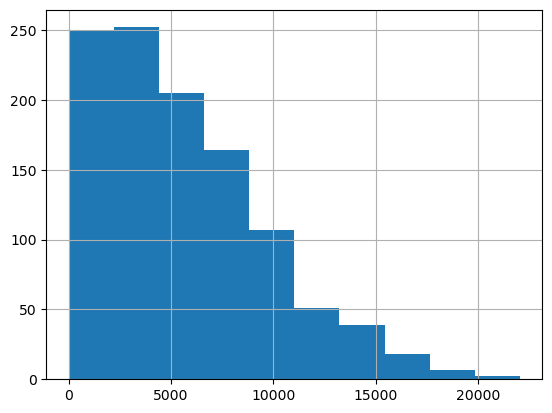

In [86]:
# Distribution of Sales
df['Sales'].hist()

Text(0, 0.5, 'Frequency')

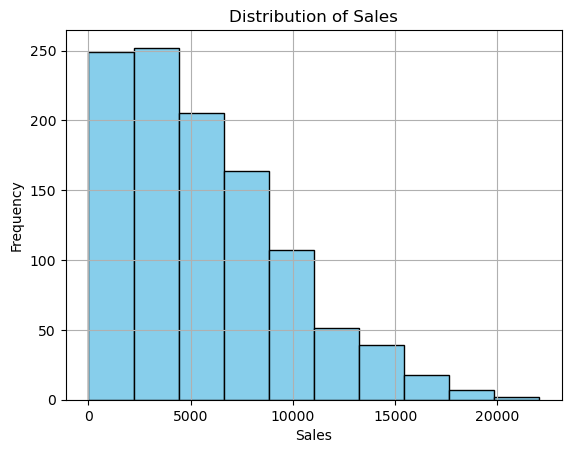

In [97]:
# Customize the histogram to display the distribution of sales data
df['Sales'].hist(color='skyblue', edgecolor='black', bins=10)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

### Observation
It has been observed that there is more sales person that made sales above `$5000` with over 75% making sales of about `$8000` while 25% are making about $2400.

In [105]:
df['Sales'].mode()[0]

2317

In [111]:
df['Sales'].median()

4868.5

In [119]:
df['Sales'].describe().astype('int')

count     1094
mean      5652
std       4102
min          7
25%       2390
50%       4868
75%       8027
max      22050
Name: Sales, dtype: int32

## Boxplot 

In [124]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Sales', 'Boxes Shipped',
       'Month', 'Month Name'],
      dtype='object')

<Axes: xlabel='Country', ylabel='Sales'>

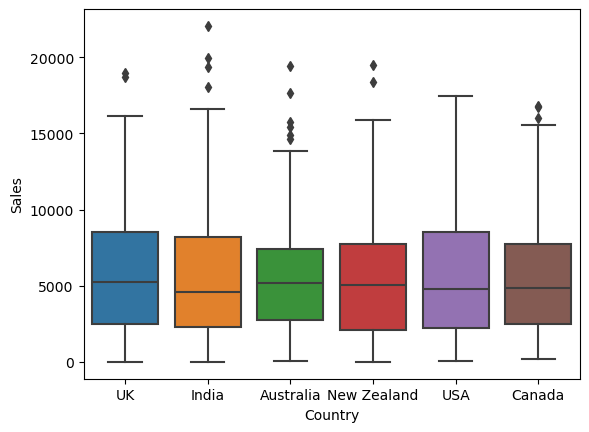

In [150]:
sns.boxplot(data = df, y = 'Sales', x = 'Country')

# Scatter Plot

<Axes: xlabel='Boxes Shipped', ylabel='Sales'>

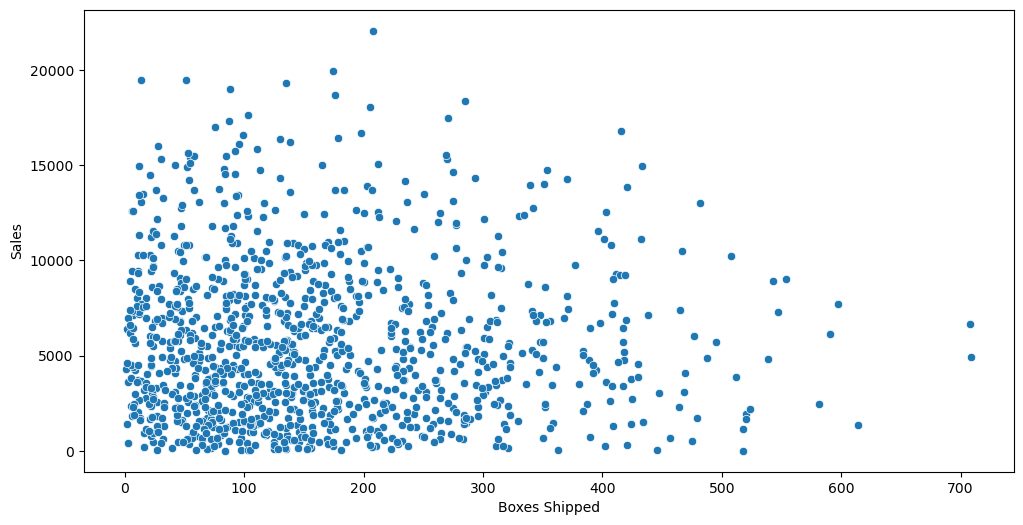

In [187]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x ='Boxes Shipped', y = 'Sales')

<Axes: xlabel='Boxes Shipped', ylabel='Sales'>

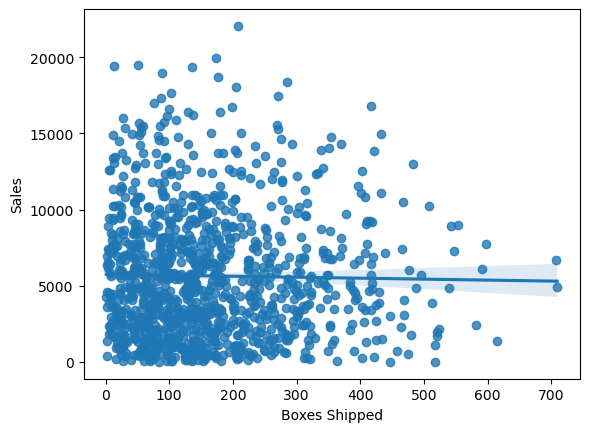

In [155]:
sns.regplot(data = df, x ='Boxes Shipped', y = 'Sales')

In [159]:
df['Sales'].corr(df['Boxes Shipped'])

-0.018826853675834223

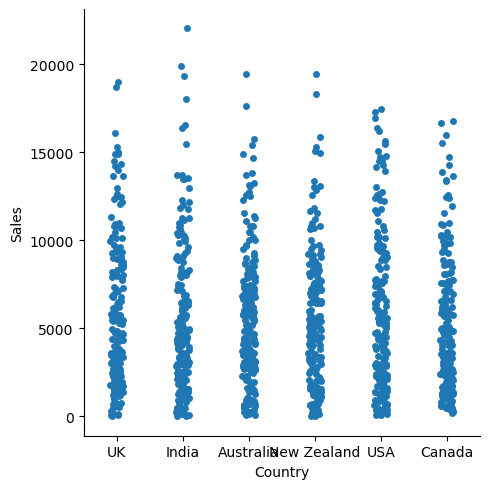

In [163]:
sns.catplot(data = df, kind = 'strip', x = 'Country', y = 'Sales')
plt.show()

<Figure size 1200x600 with 0 Axes>

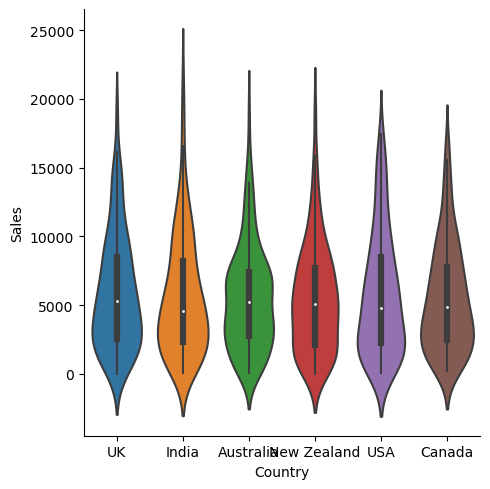

In [185]:
plt.figure(figsize = (12,6))
sns.catplot(data = df, kind = 'violin', x = 'Country', y = 'Sales')
plt.show()

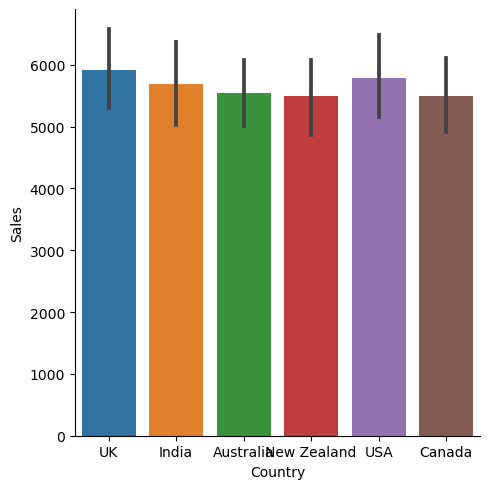

In [195]:
sns.catplot(data = df, kind = 'bar', x = 'Country', y = 'Sales')
plt.show()